In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('crop_yield.csv')


In [3]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [5]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
df['Crop'].unique()


array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [7]:
df['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [8]:
df['State'].unique()

array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

In [9]:
label_encoder = LabelEncoder()

In [10]:
encoded_cols = ['Crop','Season','State']

for col in encoded_cols:
    df[col] = label_encoder.fit_transform(df[col])


df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909


In [11]:
df['Crop'].unique()

array([ 0,  1,  8,  9, 11, 13, 16, 21, 23, 24, 26, 29, 31, 32, 37, 39, 40,
       43, 44, 46, 48, 49, 50, 51, 53,  2,  5,  6, 10, 14, 15, 17, 19, 20,
       38,  7,  3, 45,  4, 22, 25, 27, 34, 41, 42, 47, 52, 36, 54, 33, 12,
       30, 18, 35, 28])

In [12]:
df['Season'].unique()

array([4, 1, 2, 0, 3, 5])

In [13]:
df['State'].unique()

array([ 2, 12, 13, 17, 29, 21,  6,  0, 24, 20,  3,  7, 14, 15, 18, 22, 27,
        8,  9, 26, 19,  4, 28, 11,  5, 16, 10, 25,  1, 23])

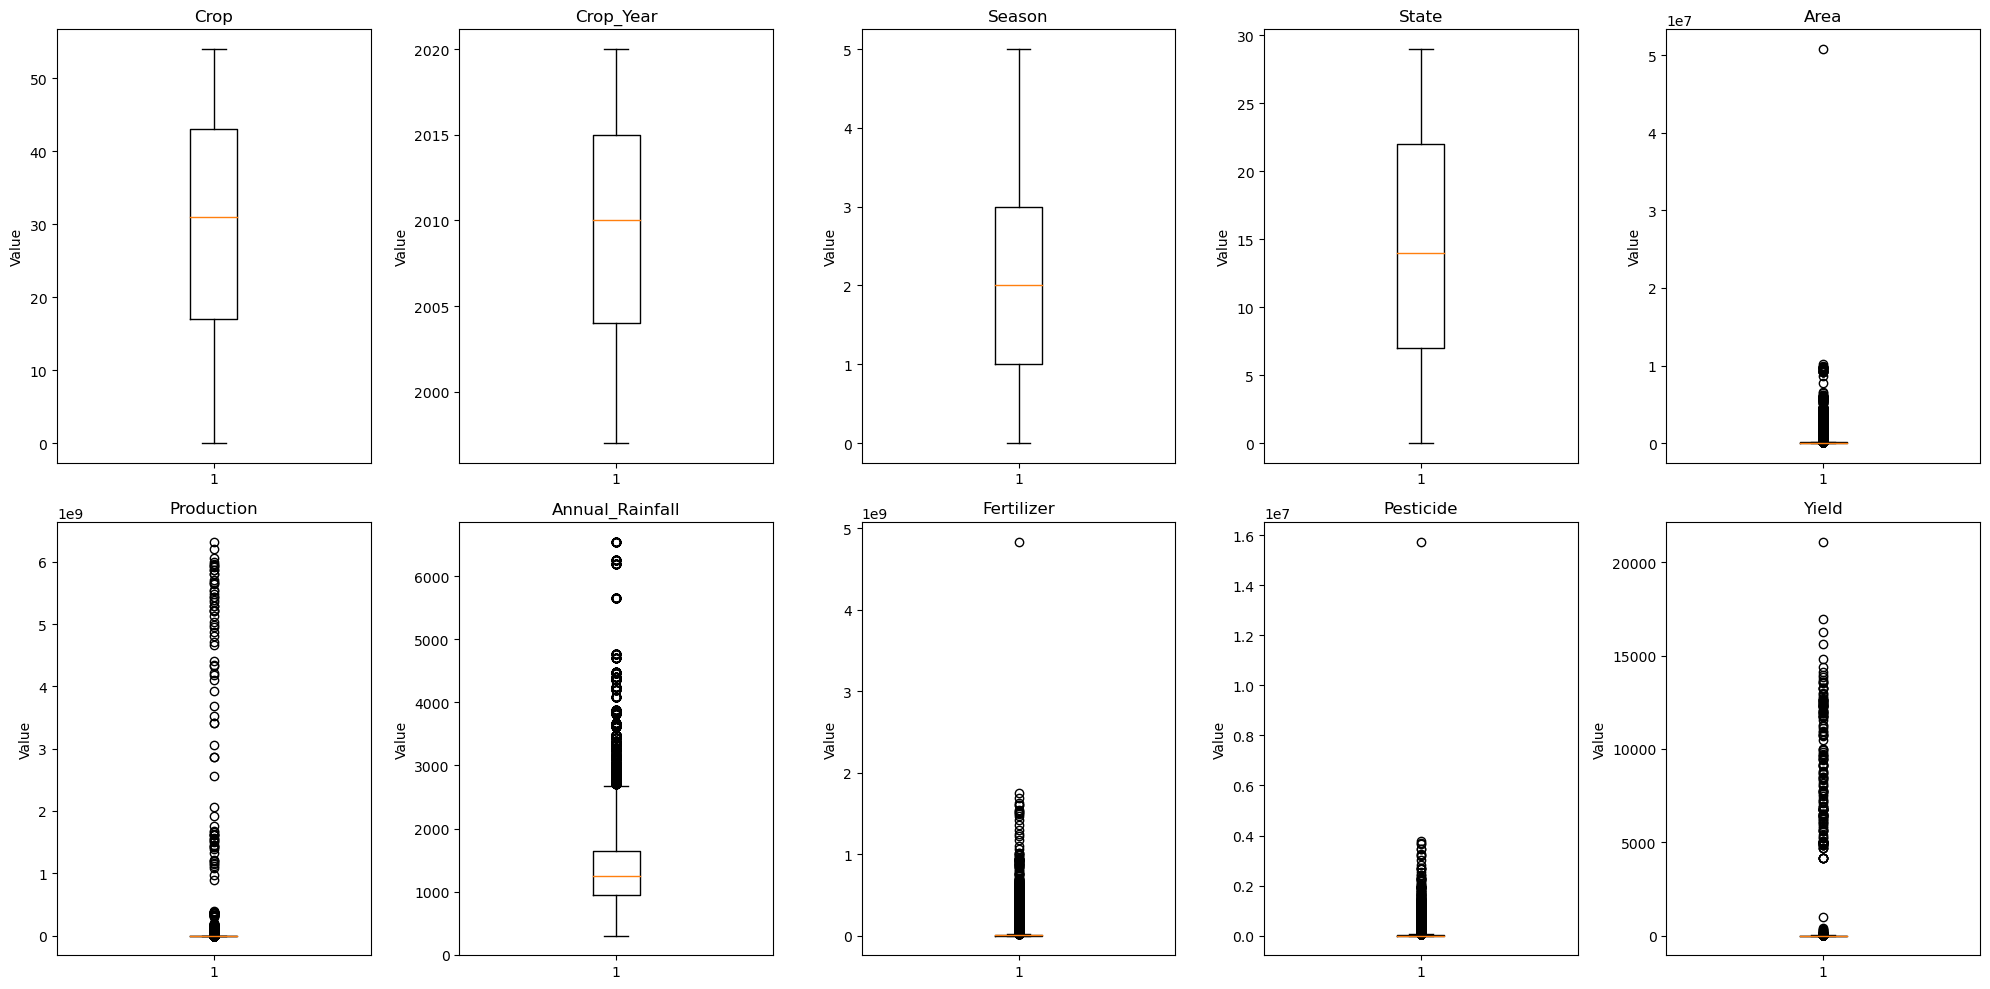

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  

axes = axes.flatten()

columns_to_plot = df.columns

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  
    ax.boxplot(df[column])  
    ax.set_title(column)  
    ax.set_ylabel('Value')  
    

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

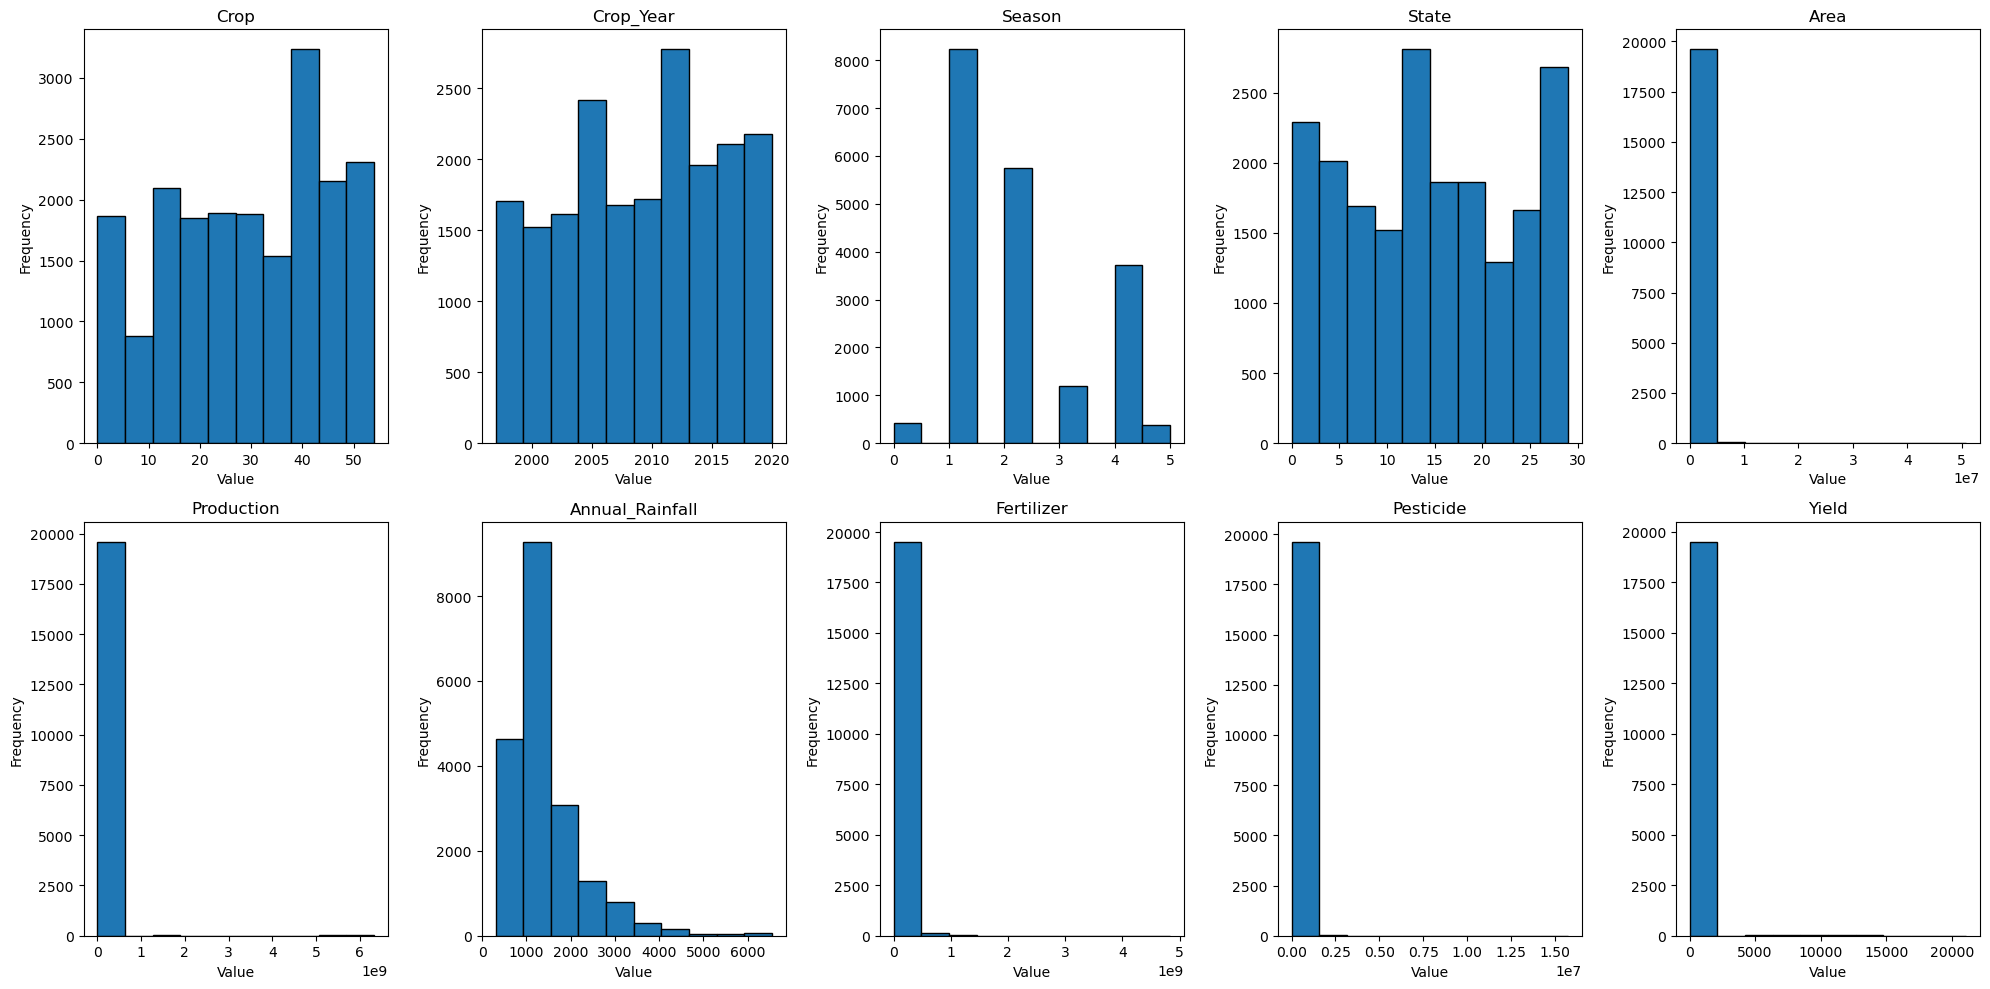

In [15]:
columns_to_plot = df.columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  
    ax.hist(df[column], bins=10, edgecolor='black')  
    ax.set_title(column)  
    ax.set_xlabel('Value')  
    ax.set_ylabel('Frequency')  

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("Number of outliers for each column in the dataset: ")
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

def winsorization(x, lower, upper):

    if x < lower:
       return lower

    elif x > upper:
       return upper

    else:
      return x

lower_limit = df.quantile(0.1)
upper_limit = df.quantile(0.8)

for column in df.columns:
    if column not in ['State', 'Season', 'Crop']:
       df[column] = df[column].apply(winsorization, args=(lower_limit[column], upper_limit[column]))

Number of outliers for each column in the dataset: 
Crop                  0
Crop_Year             0
Season                0
State                 0
Area               3076
Production         3373
Annual_Rainfall    1527
Fertilizer         3093
Pesticide          3036
Yield              3065
dtype: int64


In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("Number of outliers for each column in the dataset: ")
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())


Number of outliers for each column in the dataset: 
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


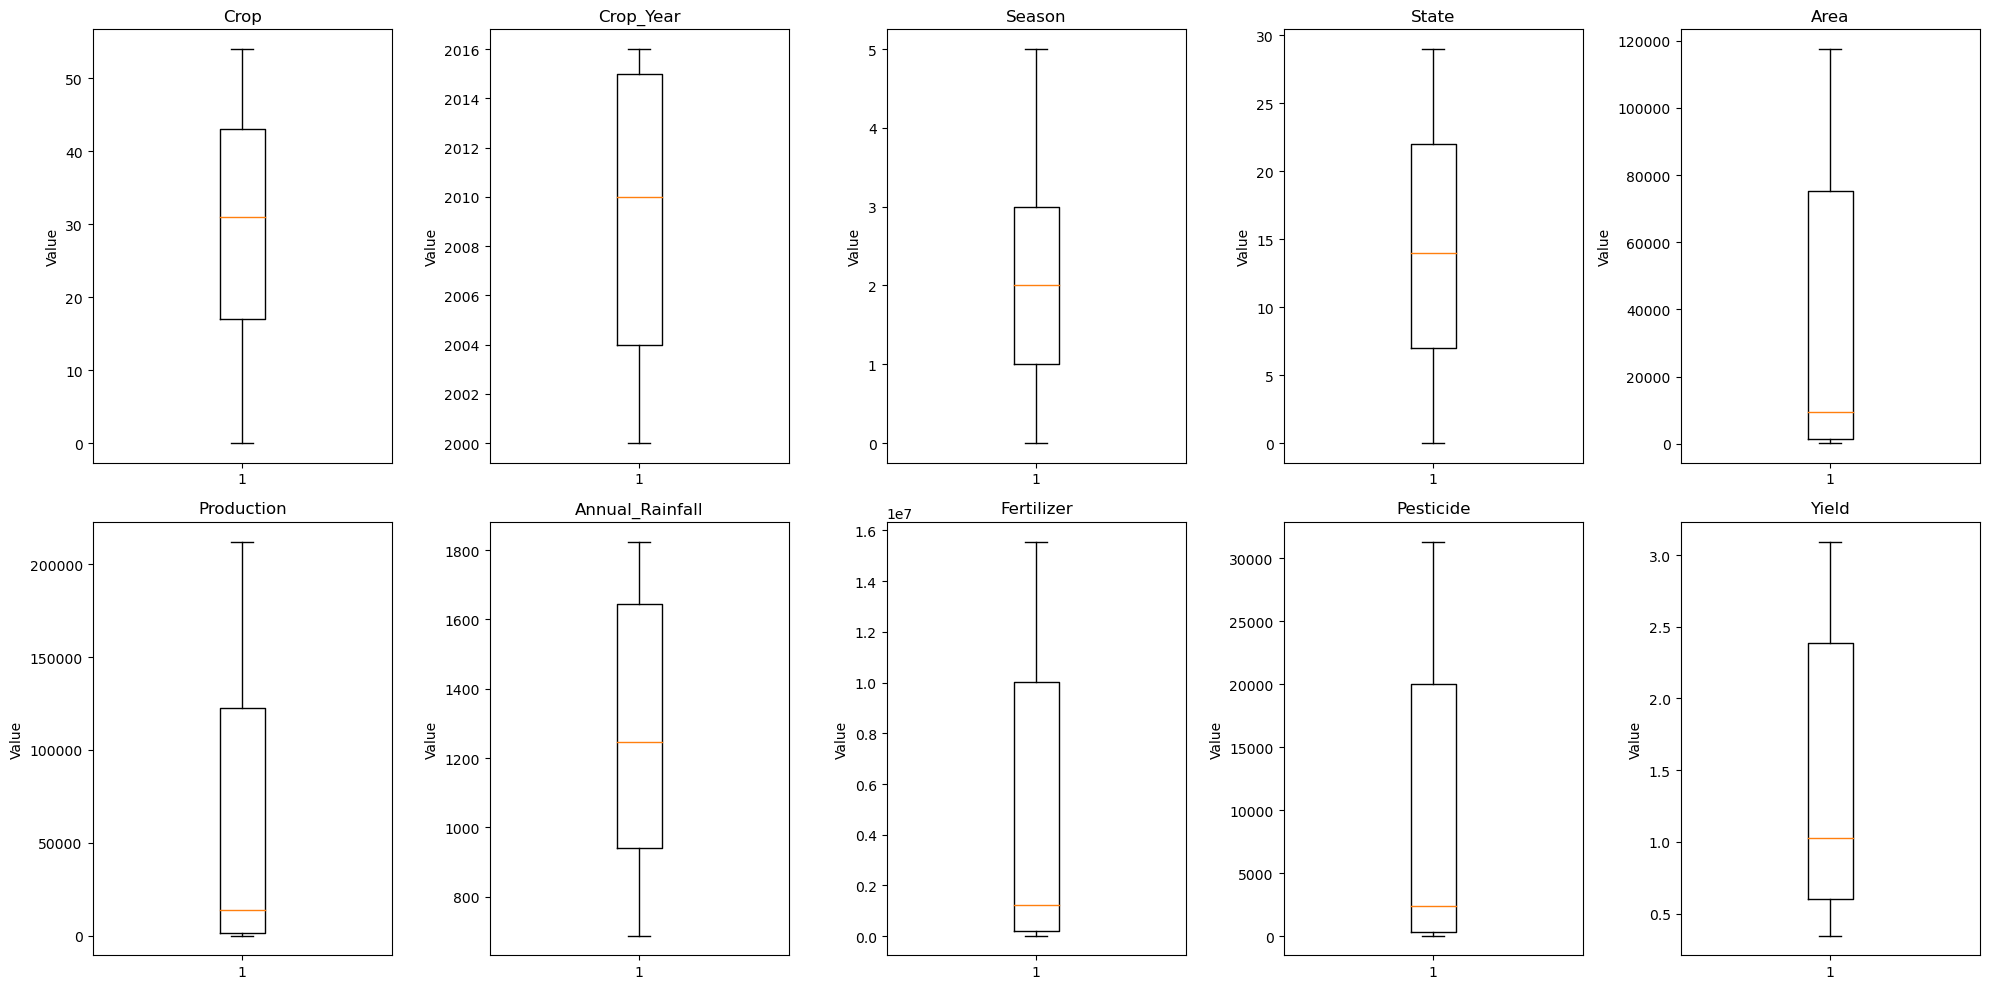

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  

axes = axes.flatten()

columns_to_plot = df.columns

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  
    ax.boxplot(df[column])  
    ax.set_title(column)  
    ax.set_ylabel('Value') 
    

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

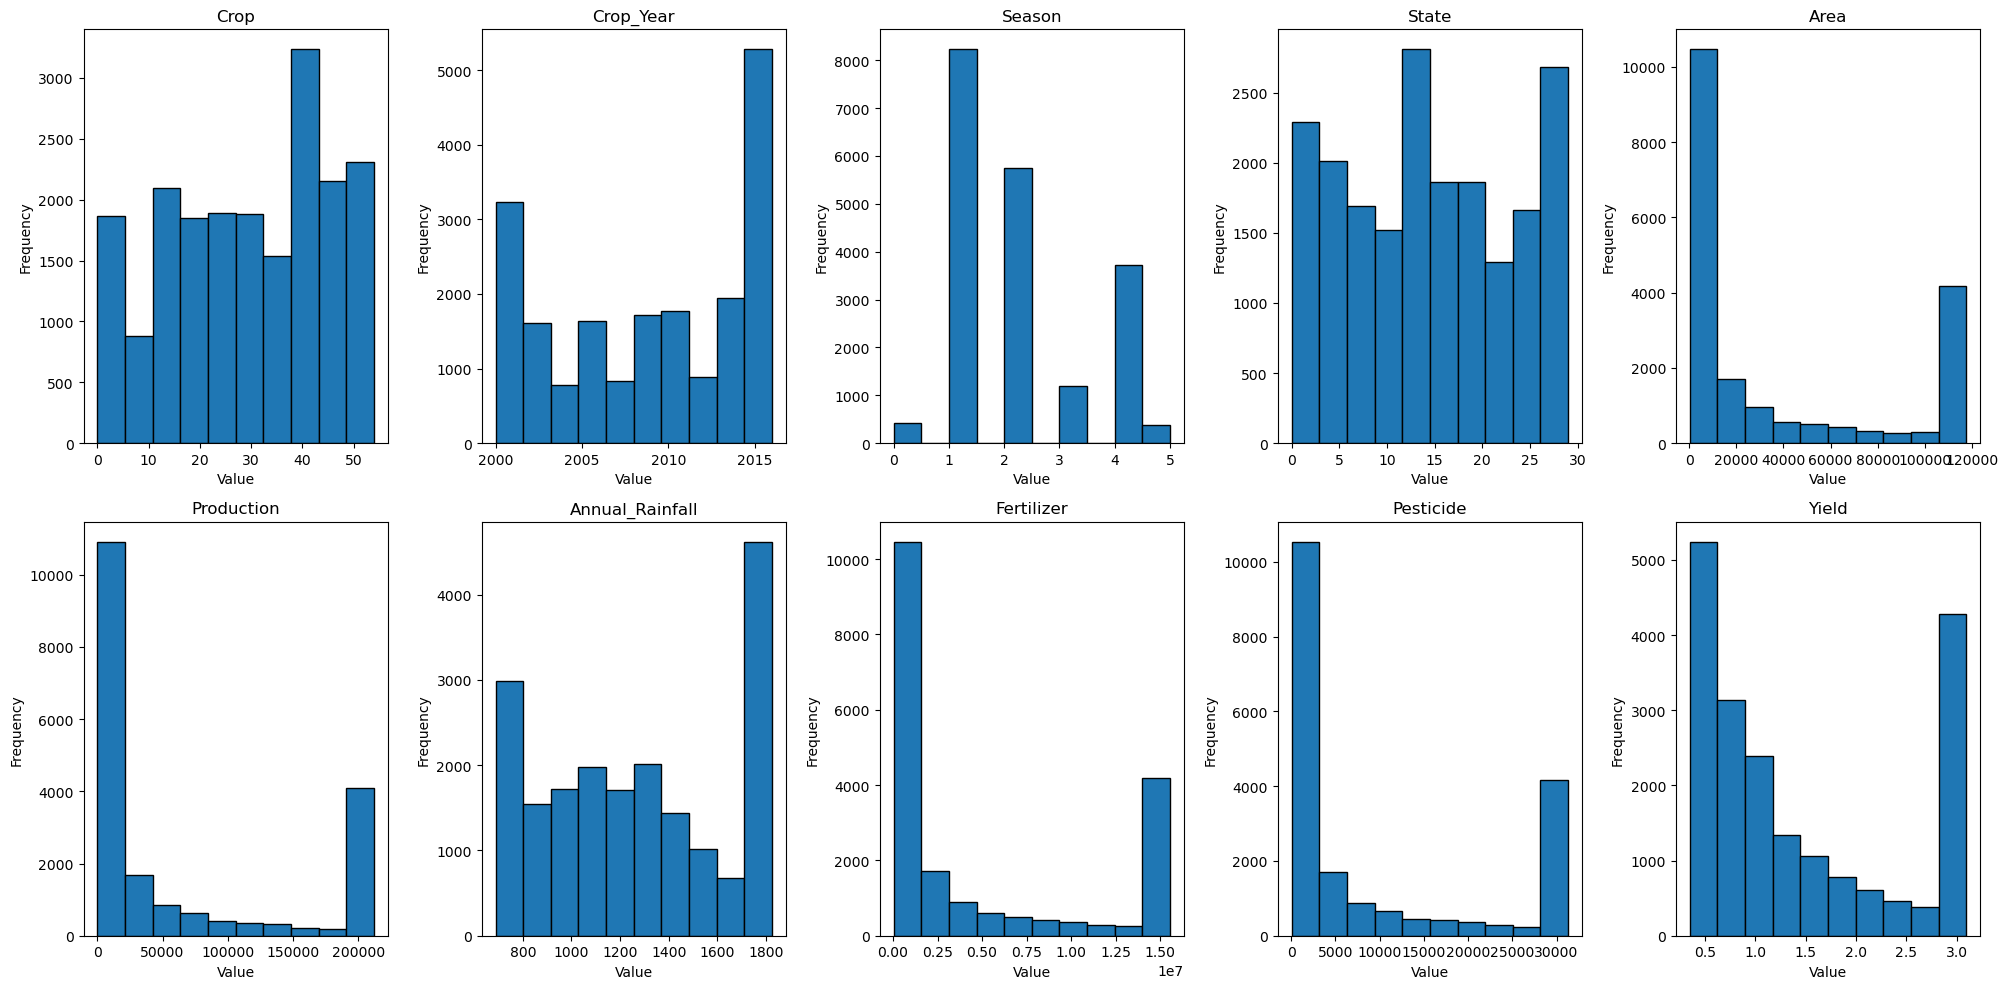

In [19]:
columns_to_plot = df.columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  
    ax.hist(df[column], bins=10, edgecolor='black')  
    ax.set_title(column)  
    ax.set_xlabel('Value')  
    ax.set_ylabel('Frequency')  
    

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

In [20]:
data_scaled = df.copy()
columns_to_scale2 = ['Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area']

scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled[columns_to_scale2]), columns=columns_to_scale2)

data_scaled = pd.concat([data_scaled, df.drop(columns=columns_to_scale2)], axis=1)

print("\nScaled DataFrame (Z-score scaled):")
print(data_scaled)


Scaled DataFrame (Z-score scaled):
       Production  Annual_Rainfall  Fertilizer  Pesticide      Area  Crop  \
0       -0.082890         1.408684    0.339916   1.051845  0.787388     0   
1       -0.702631         1.408684   -0.696630  -0.627331 -0.653814     1   
2       -0.756692         1.408684   -0.786757  -0.773334 -0.779126     8   
3        1.768766         1.408684   -0.495746  -0.301904 -0.374507     9   
4       -0.748984         1.408684   -0.772207  -0.749763 -0.758895    11   
...           ...              ...         ...        ...       ...   ...   
19684   -0.734617         0.573757   -0.734965  -0.699697 -0.710388    44   
19685   -0.722704         0.573757   -0.783021  -0.769847 -0.774750    53   
19686    1.768766         0.211367    1.723498   1.731325  1.725078    24   
19687   -0.693065         0.211367    1.723498   1.731325  1.725078    40   
19688    1.768766         0.211367    1.723498   1.731325  1.725078    53   

       Crop_Year  Season  State     Yie

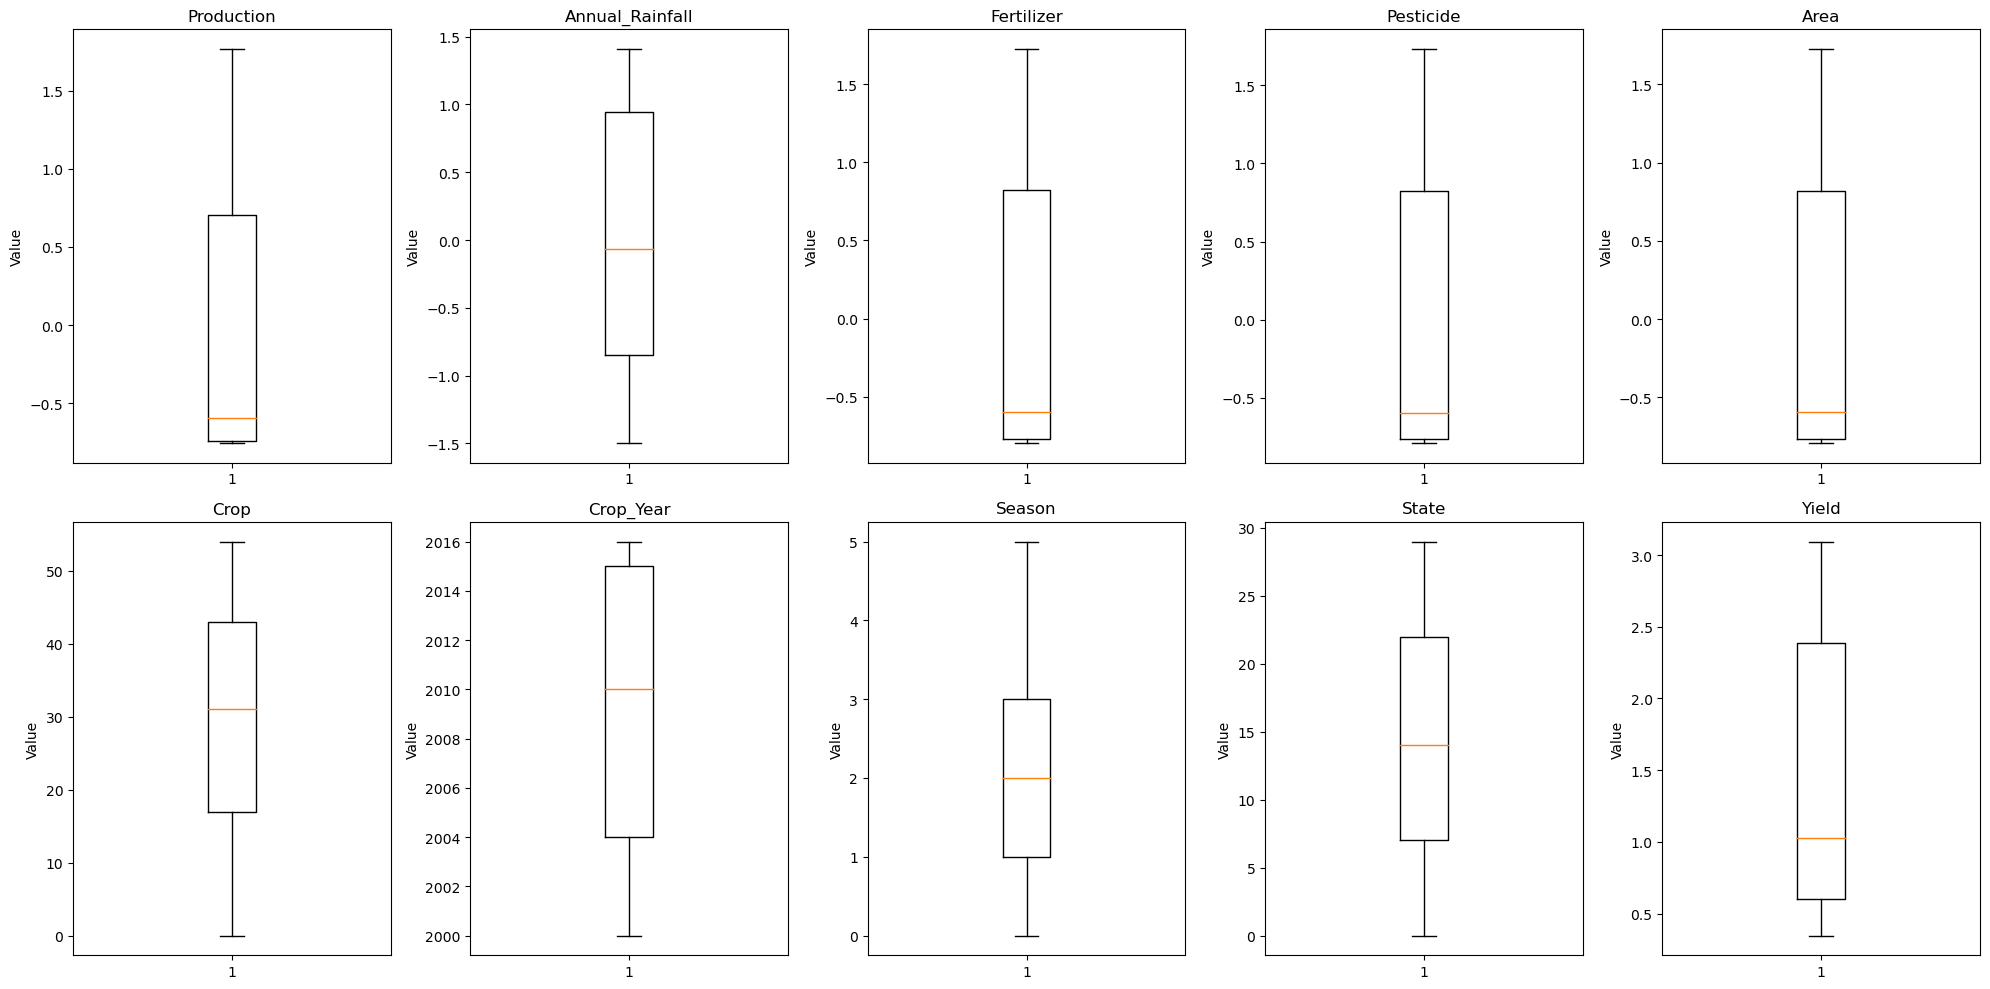

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  


axes = axes.flatten()

columns_to_plot = data_scaled.columns

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  
    ax.boxplot(data_scaled[column])  
    ax.set_title(column)  
    ax.set_ylabel('Value')  
    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

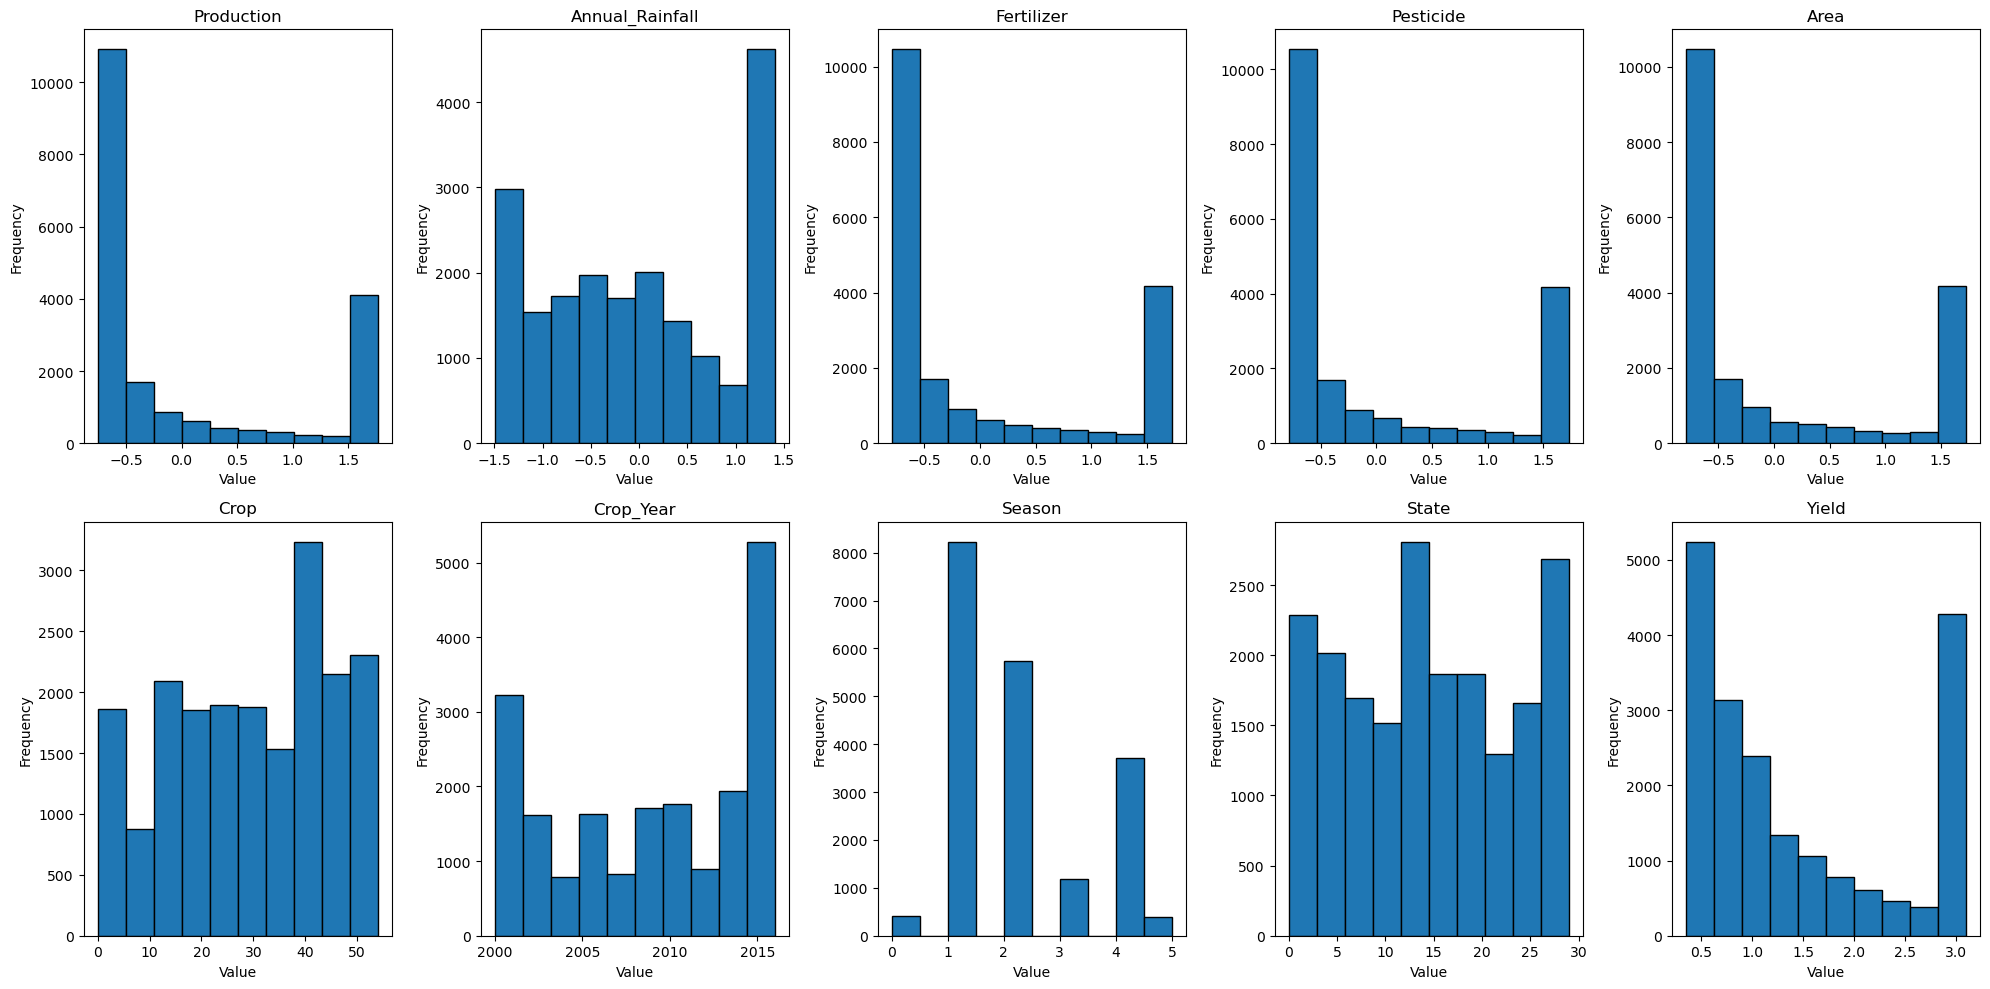

In [22]:
columns_to_plot = data_scaled.columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  
    ax.hist(data_scaled[column], bins=10, edgecolor='black')  
    ax.set_title(column)  
    ax.set_xlabel('Value')  
    ax.set_ylabel('Frequency')  
    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [23]:
df.to_csv('cleaned_data.csv', index=False)
data_scaled.to_csv('scaled_data.csv', index=False)